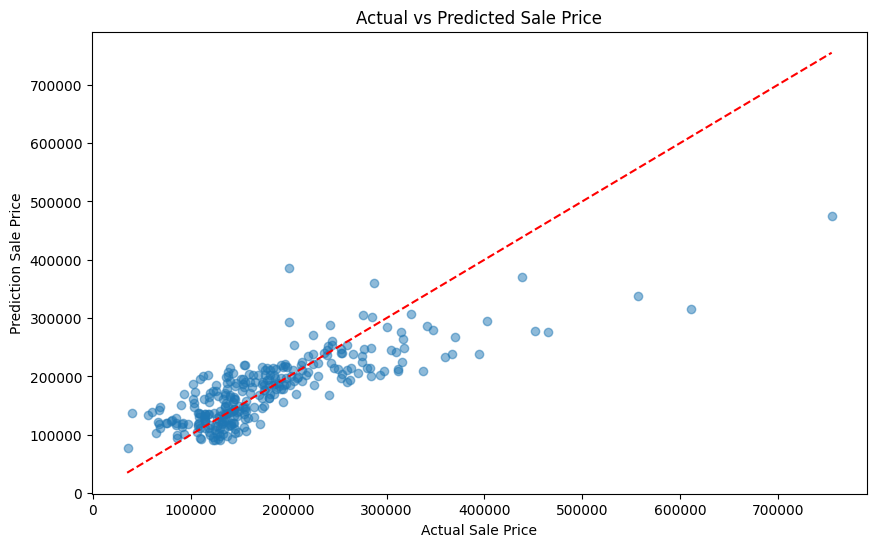

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


train_data = pd.read_csv(r"C:\Users\aishwarya amin\house-prices-advanced-regression-techniques\train.csv")
test_data = pd.read_csv(r"C:\Users\aishwarya amin\house-prices-advanced-regression-techniques\train.csv")





for column in train_data.columns:
    if train_data[column].dtype == 'object':
        #fill missing values with the mode for categorical features
        train_data[column].fillna(train_data[column].mode()[0])
        if column in test_data.columns:
            test_data[column].fillna(test_data[column].mode()[0])
    else:
        #fill the missing value with the mean for numeric features
        train_data[column].fillna(train_data[column].mean())
        if column in test_data.columns:
            test_data[column].fillna(test_data[column].mean())

# Select features
features=['GrLivArea','BedroomAbvGr','FullBath','HalfBath','TotRmsAbvGrd']
X = train_data[features]
y = train_data['SalePrice']



#Split the training data for validation 
X_train,X_val,y_train,y_val = train_test_split(X, y,test_size=0.2,random_state=42)

# Train the model
model=LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_val)
mae = mean_absolute_error(y_val,y_pred)
mse = mean_squared_error(y_val,y_pred)
r2 = r2_score(y_val, y_pred)


plt.figure(figsize=(10,6))
plt.scatter(y_val,y_pred,alpha=0.5)
plt.xlabel('Actual Sale Price')
plt.ylabel('Prediction Sale Price')
plt.title('Actual vs Predicted Sale Price')
plt.plot([y.min(),y.max()],[y.min(),y.max()],'r--')
plt.show()



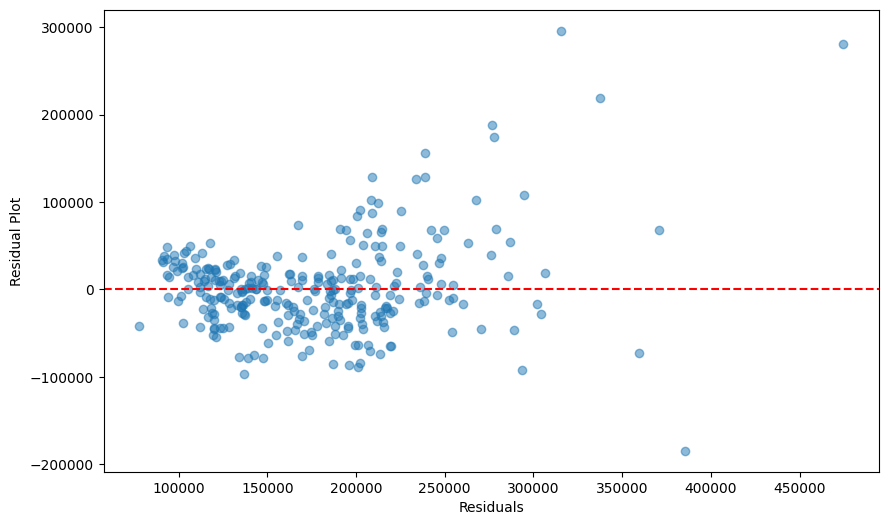

In [3]:
residuals =y_val - y_pred
plt.figure(figsize=(10,6))
plt.scatter(y_pred,residuals,alpha=0.5)
plt.xlabel('Predicted Sale Price')
plt.xlabel('Residuals')
plt.ylabel('Residual Plot')
plt.axhline(y=0 , color ='r' , linestyle='--')
plt.show()

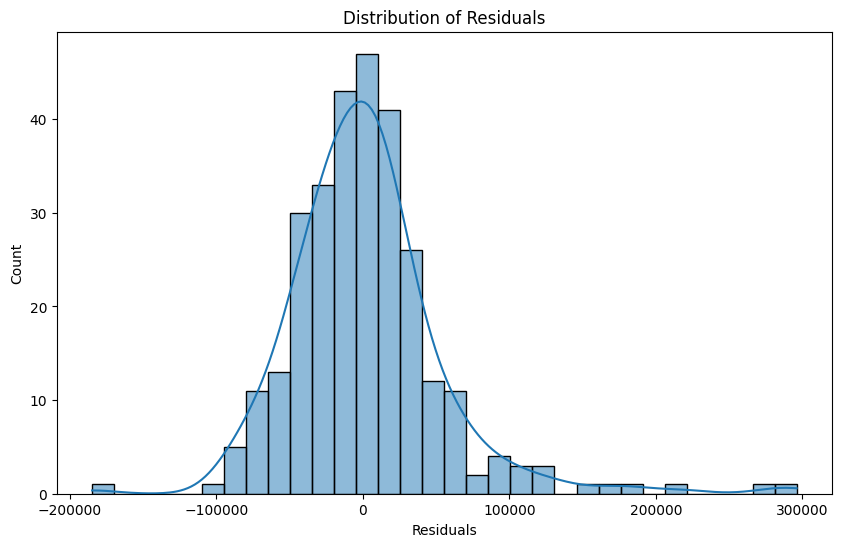

In [4]:
plt.figure(figsize=(10,6))
sns.histplot(residuals,kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

<Figure size 1200x800 with 0 Axes>

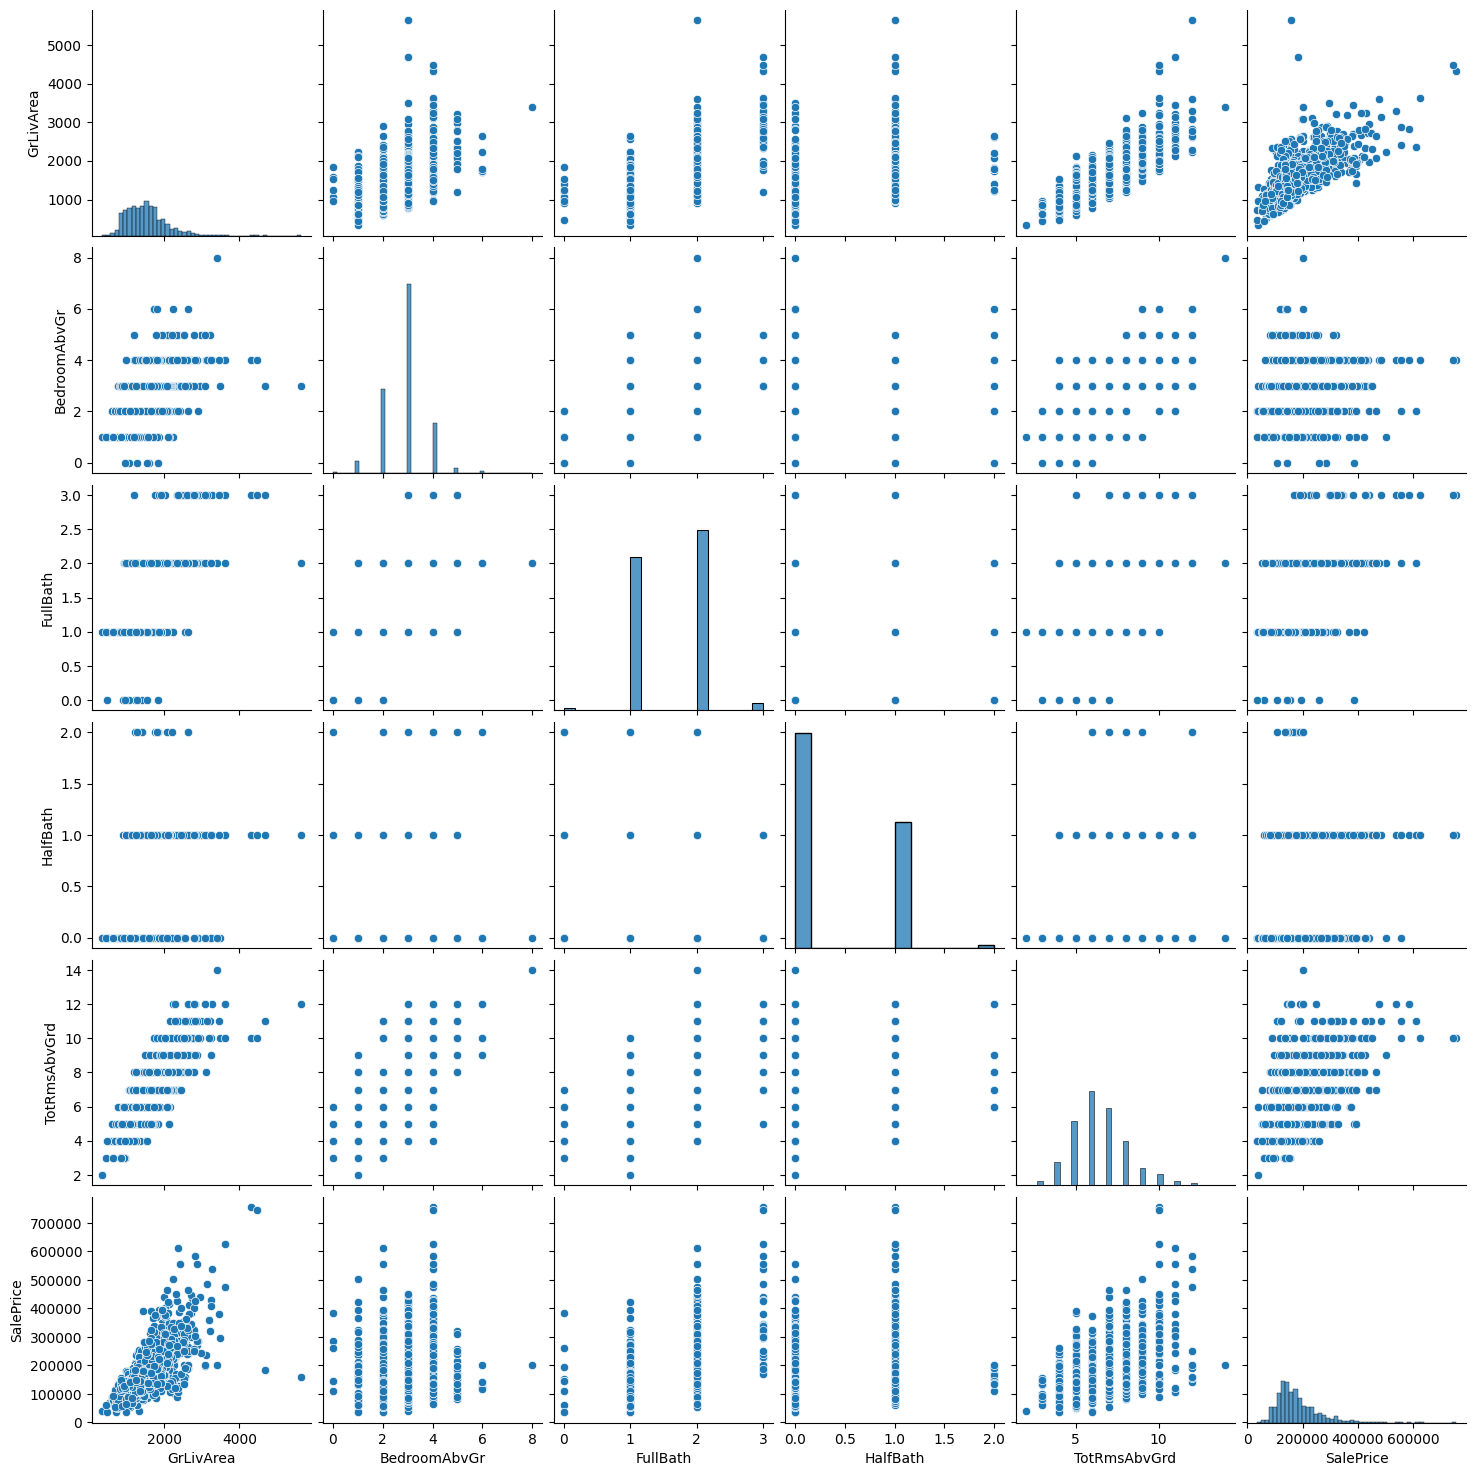

In [6]:
plt.figure(figsize=(12,8))
sns.pairplot(train_data[features +['SalePrice']])
plt.show()

In [7]:
example = pd.DataFrame({
    'GrLivArea':[2000],
    'BedroomAbvGr':[3]
    ,'FullBath':[2]
    ,'HalfBath':[1]
    ,'TotRmsAbvGrd':[7] 
})
example_prediction = model.predict(example)
print(type(example_prediction[0]))
print(f'Example Prediction: ${example_prediction[0]:,.2f}')

# Prepare the test data and make predictions
X_test = test_data[features]
test_predictions = model.predict(X_test)

# Save predictions

submission = pd.DataFrame({'Id': test_data['Id'],'SalePrice':test_predictions})
submission.to_csv('submission.csv',index=False)


<class 'numpy.float64'>
Example Prediction: $240,896.28
